## Observations and Insights 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how = "outer", on ="Mouse ID")
merge_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [116]:
# Checking the number of mice.
number_of_mice_unclean = len(merge_df['Mouse ID'])
number_of_mice_unclean

1893

In [117]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ids


array(['g989'], dtype=object)

In [118]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df["Mouse ID"] == "g989"
merge_df.loc[merge_df["Mouse ID"] == "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = merge_df[merge_df["Mouse ID"].isin(duplicate_ids)==False]
clean_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [120]:
# Checking the number of mice in the clean DataFrame.
clean_mouse["Mouse ID"].nunique()

clean_mouse_df = clean_mouse
clean_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_statistics = pd.DataFrame(merge_df.groupby("Drug Regimen").count())

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_statistics['Mean'] = merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_statistics['Median'] = merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_statistics['Variance'] = merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_statistics['Standard Deviation'] = merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_statistics['SEM'] = merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.



In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = summary_statistics[["Mouse ID", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]]

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics['Mean'] = summary_statistics['Mean'].map("{:,.4f}".format)
summary_statistics['Median'] = summary_statistics['Median'].map("{:,.4f}".format)
summary_statistics['Variance'] = summary_statistics['Variance'].map("{:,.4f}".format)
summary_statistics['Standard Deviation'] = summary_statistics['Standard Deviation'].map("{:,.4f}".format)
summary_statistics['SEM'] = summary_statistics['SEM'].map("{:,.4f}".format)

summary_statistics

,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,178,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,178,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,188,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,186,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,181,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,161,52.3226,50.8546,42.3511,6.5078,0.5129
Ramicane,228,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,181,54.2331,52.4317,59.4506,7.7104,0.5731


## Bar and Pie Charts

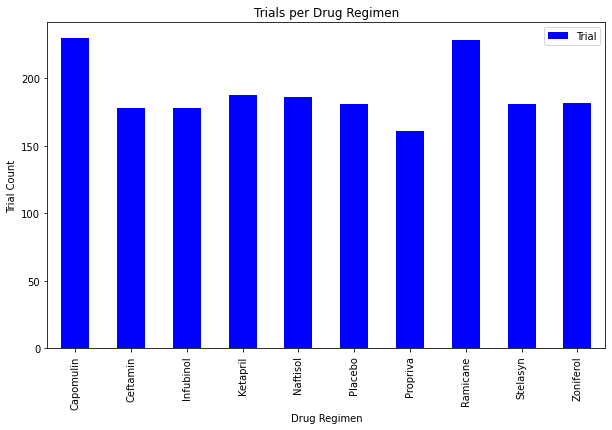

<Figure size 432x288 with 0 Axes>

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
summarystats_df = pd.DataFrame(merge_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen_data = merge_df[["Drug Regimen","Mouse ID"]]

# data for bar plot so "Drug Regimen" is x-axis label
datapoints = summary_statistics[['Mouse ID']]
datapoints = datapoints.rename(columns = {"Mouse ID" : "Trial"})

# bar chart information
datapoints.plot(kind="bar", figsize=(10,6), color = "b", legend=True)

plt.title("Trials per Drug Regimen")
plt.ylabel("Trial Count")
plt.show()
plt.tight_layout()


In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


<AxesSubplot:ylabel='Sex'>

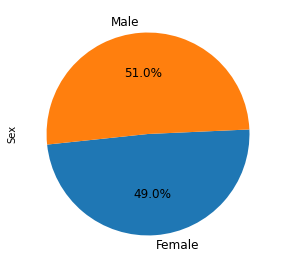

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_mouse_df.groupby('Sex')
gender_qty = gender["Sex"].count()

# Generate pie plot with data
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect = 'equal')
gender_qty.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = False, fontsize = 12)


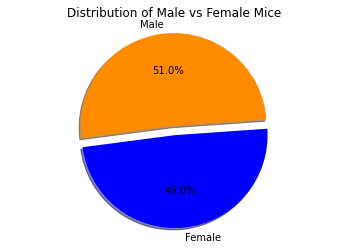

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_mouse_df["Sex"].value_counts()

# Labels(male and female)
labels = ["Male", "Female"]

# Colors of pies
colors = ["darkorange", "blue"]


# Define each section
explode = (0.1, 0)

# Direct matplotlib to create a pie chart based upon the above data
plt.pie(gender, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 364)
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice")

# Generate pie plot
plt.show()


## Quartiles, Outliers and Boxplots

In [127]:
# dataframe
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin2_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_max)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_vol, clean_mouse_df, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [129]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [130]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment')

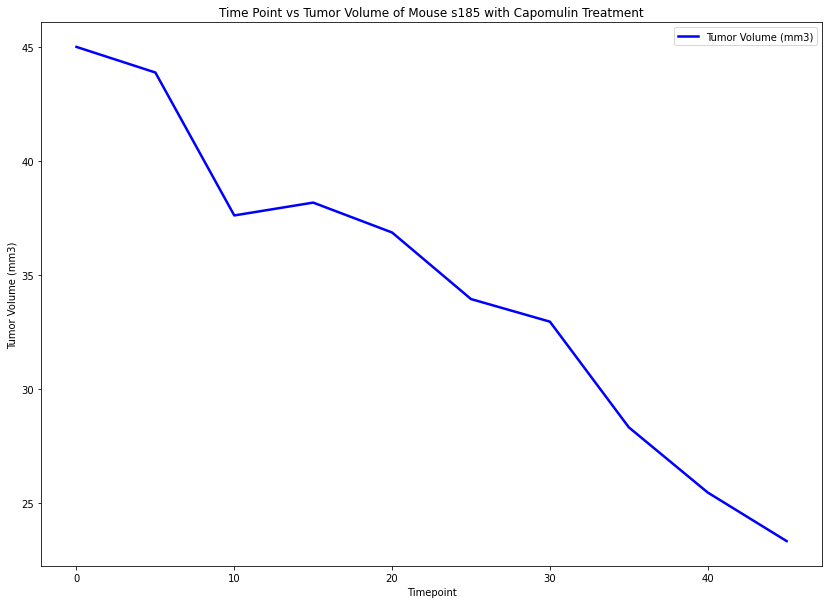

In [131]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Isolate Capomulin Drug Regimen
capomulin_df = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

# Isolate data of a single mouse (s185)
# loc slicing by name
capomulin_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_s185_df.head()

# Isolate columns of single mouse (s185)
capomulin_s185_df = capomulin_s185_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]

# Set the index of capomulin_s185_df
capomulin_s185_df = capomulin_s185_df.reset_index(drop=True)

# Generate a line plot of time point versus tumor volume for a mouse (s185) treated with Capomulin
capomulin_s185_df.set_index('Timepoint').plot(figsize=(14,10), linewidth=2.5, color='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment")

In [132]:
capomulin_df.head()
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_filtered_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [133]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename tumor volume column to Average Tumor Volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


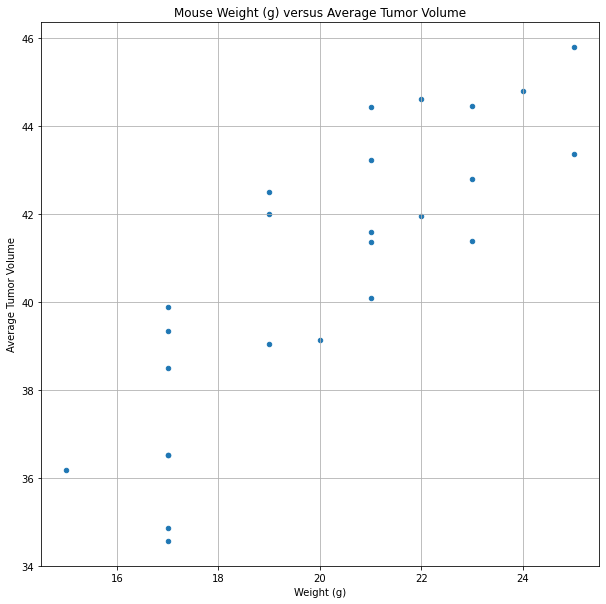

In [134]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mean.set_index('Mouse ID')

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(10,10), 
                    title="Mouse Weight (g) versus Average Tumor Volume")
plt.show()

## Correlation and Regression

In [135]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [136]:
# Calculate the correlation coefficient and linear regression model
mouse_weight = capomulin_mean.iloc[:,0]
average_tumor_volume = capomulin_mean.iloc[:,1]

# correlation
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

The correlation between mouse weight and average tumor volume is 0.84.


In [137]:
# for mouse weight and average tumor volume for the Capomulin regimen

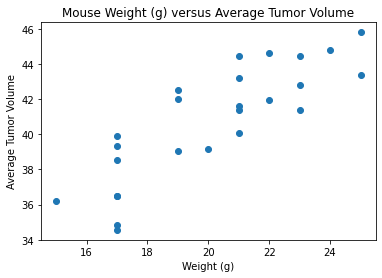

In [138]:
# Create beginning steps for linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.show()

In [139]:
# Add the linear regression equation and line to plot
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [140]:
# y=mx+b
y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')

Predicted y is 42.54983369121531 vs an actual value of 41.963635634


The r-squared is: 0.7088568047708717


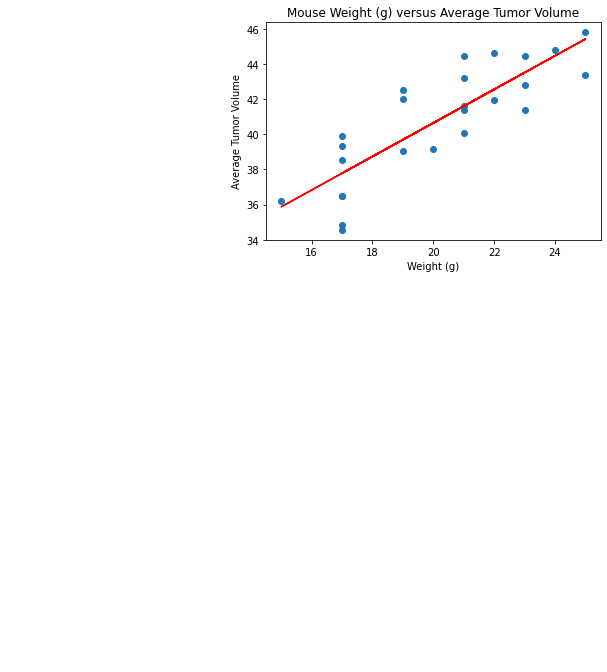

In [141]:
# Calculate regress values and r-squared
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()